# Body-Rocking Behavior Recognition

In [23]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# ===========

import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
import itertools

In [24]:
EACH_READING_IN_MILLISECONDS = 20
WINDOW_SIZE_SECONDS = 2
n = int((WINDOW_SIZE_SECONDS * 1000) / EACH_READING_IN_MILLISECONDS)

In [25]:
def get_features(data, fs):
    # This returns 42 dimensions .. 21 dimentions for accelarometer
    # 21 dimentions for gyroscope

    f1 = np.mean(data, axis=0)
    C = np.cov(data.T)
    f2 = np.concatenate((C[0, 0:3], C[1, 1:3], C[2, 2:3]))
    f3 = np.array([skew(data.iloc[:, 0]), skew(data.iloc[:, 1]), skew(data.iloc[:, 2])])
    f4 = np.array([kurtosis(data.iloc[:, 0]), kurtosis(data.iloc[:, 1]), kurtosis(data.iloc[:, 2])])
    f5 = np.zeros(3)
    f6 = np.zeros(3)
    for i in range(0,3):
        g = abs(np.fft.fft(data.iloc[:,i]))
        g = g[0:round(len(g)/2)]
        g[0] = 0
        max_i = np.argmax(g)
        f5[i] = g[max_i]
        f6[i] = fs * max_i
    return np.concatenate((f1, f2, f3, f4, f5, f6))

In [51]:
def generate_features(df):
    df_out = pd.DataFrame(columns=[i for i in range(0, 41)])
    fs = 1 / n
    f_itr = 0
    for i in range(0, df.shape[0], int(n)):
        features_accel = get_features(df.iloc[i:i+n, 0:3], fs)
        features_gyro = get_features(df.iloc[i:i+n, 3:6], fs)
        features = np.concatenate((features_accel, features_gyro))
#         print(features.shape)
#         print(df_out.shape)
        df_out[f_itr] = features
        f_itr += 1
    return df_out

In [52]:
for session in sessions:
    df_data_arm = pd.read_csv('TrainingData/{}/armIMU.txt'.format('Session01'),  delim_whitespace=True, header=None)
    arm_features = generate_features(df_data_arm)
arm_features

,0,1,2,3,4,5,6,7,8,9,...,2535,2536,2537,2538,2539,2540,2541,2542,2543,2544
0,-0.798030,-7.997200e-01,-0.802300,-0.788100,-0.788950,-0.789280,-7.990200e-01,-0.818480,-0.836250,-0.822570,...,-9.432600e-01,-9.428900e-01,-0.941680,-0.938920,-0.957780,-0.542240,-0.957780,-0.977190,-0.975200,-0.855600
1,0.529100,5.242300e-01,0.518820,0.543580,0.539700,0.539240,5.222000e-01,0.495010,0.473150,0.490960,...,-6.906000e-02,-6.769000e-02,-0.070060,-0.081840,-0.072640,0.504280,0.190760,0.119460,0.142300,0.298455
2,0.382290,3.838200e-01,0.386960,0.383860,0.387550,0.387820,3.897100e-01,0.383340,0.374580,0.380680,...,4.239600e-01,4.239100e-01,0.425700,0.421780,0.359140,0.633360,0.328220,0.332410,0.347690,0.475655
3,0.000195,7.986020e-05,0.000073,0.000017,0.000046,0.000028,3.337333e-05,0.000788,0.000895,0.000077,...,9.527677e-06,7.896869e-06,0.000012,0.000038,0.004566,0.084205,0.004797,0.000133,0.000561,0.001447
4,0.000279,9.952081e-05,0.000072,0.000032,0.000078,0.000038,3.146869e-05,0.000816,0.001364,0.000047,...,1.115556e-06,-1.152525e-07,0.000004,-0.000047,0.007799,-0.001165,0.008281,-0.000010,-0.000319,0.000545
5,-0.000018,-7.066667e-07,-0.000017,-0.000003,-0.000002,0.000003,-3.036162e-06,0.000079,0.000185,0.000061,...,8.884848e-07,-2.636465e-06,-0.000002,-0.000034,0.006133,0.041754,0.003232,-0.000055,0.000127,-0.000062
6,0.000728,4.513102e-04,0.000176,0.000138,0.000316,0.000233,1.465253e-04,0.001763,0.003225,0.000072,...,2.286505e-05,2.655949e-05,0.000025,0.000684,0.029444,0.008519,0.022587,0.000869,0.003774,0.004480
7,-0.000058,-5.297838e-05,-0.000013,-0.000017,-0.000026,-0.000001,5.333333e-07,0.000242,0.000167,0.000044,...,-4.569697e-07,3.432222e-06,0.000001,0.000483,0.021669,0.003434,0.007989,0.000106,0.001824,0.000343
8,0.000082,4.901778e-05,0.000038,0.000022,0.000024,0.000029,1.768273e-05,0.000180,0.000385,0.000067,...,7.796364e-06,8.143333e-06,0.000009,0.000412,0.018226,0.027845,0.003960,0.000134,0.001725,0.000272
9,-0.024488,1.139795e-01,1.080329,-1.627896,-1.005698,-0.448433,-1.091020e+00,-0.530790,0.585906,-0.708852,...,1.855380e-01,5.712741e-02,-0.246057,0.783519,2.184534,0.269318,0.094430,-1.689519,2.144504,-0.900879


In [3]:
sessions = ['Session01','Session05','Session06','Session07','Session12','Session13']
#files = ['armIMU.txt','detection.txt','wristIMU.txt']

In [5]:
dataAList = []
dataWList = []
dataOPList = []
for session in sessions:
    dataAList.append(pd.read_csv('TrainingData/' + session + '/armIMU.txt', header=None, sep='\s+'))
    dataWList.append(pd.read_csv('TrainingData/' + session + '/wristIMU.txt', header=None, sep='\s+'))
    dataOPList.append(pd.read_csv('TrainingData/' + session + '/detection.txt', header=None, sep='\s+'))

In [6]:
dataA = pd.concat(dataAList, axis=0, join='outer', join_axes=None, ignore_index=False,\
          keys=None, levels=None, names=None, verify_integrity=False,\
          copy=True)

dataW = pd.concat(dataWList, axis=0, join='outer', join_axes=None, ignore_index=False,\
          keys=None, levels=None, names=None, verify_integrity=False,\
          copy=True)

dataOP = pd.concat(dataOPList, axis=0, join='outer', join_axes=None, ignore_index=False,\
          keys=None, levels=None, names=None, verify_integrity=False,\
          copy=True)


In [22]:
dataA.tail()

,0,1,2,3,4,5
18641,1.307,-0.396,0.200,33.963,-86.220,-33.841
18642,1.155,-0.318,0.155,29.817,-88.659,-39.329
18643,1.155,-0.318,0.155,29.817,-88.659,-39.329
18644,1.155,-0.318,0.155,29.817,-88.659,-39.329
18645,1.133,-0.303,0.066,34.756,-99.573,-42.073


In [14]:
result = pd.concat([dataA, dataW], axis=1)
result.columns = range(result.shape[1])

In [15]:
result.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.803,0.520,0.388,2.256,-0.915,1.280,0.389,-0.219,0.934,2.805,9.268,-1.402
1,-0.801,0.539,0.378,3.293,-2.317,0.061,0.333,-0.219,0.943,0.122,4.756,0.061
2,-0.801,0.563,0.357,0.122,-1.341,0.549,0.242,-0.258,0.981,-4.390,9.939,-1.220
3,-0.788,0.556,0.367,-4.695,1.890,1.402,0.226,-0.297,0.980,-4.268,6.829,1.220
4,-0.805,0.532,0.362,-7.378,4.085,1.402,0.238,-0.301,0.957,1.524,-10.000,0.976


In [169]:
print(len(result))

924759


In [23]:
X_train, X_test, y_train, y_test = train_test_split(result, dataOP, test_size=0.33, random_state=42)

## TODO :
### 1. Applying Random Forest, SVM, MLP
### 2. Hyper Parameter Tuning

In [24]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [25]:
y_pred = clf.predict(X_test)

In [26]:
accuracy_score(y_test, y_pred)

0.7975233557579193

In [27]:
yp = dataA.ix[:,0].values.tolist()
xp = [ x for x in range(len(dataA.ix[:,0])) ]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [175]:
plt.plot(xp[:100],yp[0:100],'-o')

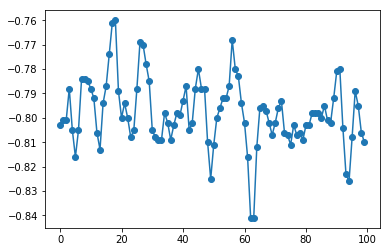

In [164]:
plt.show()

In [32]:
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=clf, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(result, dataOP)

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/anaconda3/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/anaconda3/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x10ae3a390, file "/ana...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/anaconda3/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x10ae3a390, file "/ana...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/anaconda3/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         self.io_loop = ioloop.IOLoop.current()
    477         try:
--> 478             self.io_loop.start()
        self.io_loop.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    479         except KeyboardInterrupt:
    480             pass
    481 
    482 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': '# param_grid = dict(epochs=[10,20,30])\noptimizer...n_jobs=-1)\ngrid_result = grid.fit(result, dataOP)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 3, 18, 17, 44, 22, 560558, tzinfo=tzutc()), 'msg_id': 'bd6e70ffbe236f87881b16b1c4d1e67d', 'msg_type': 'execute_request', 'session': '79a445a73583591dfe743fef44e1e6e4', 'username': '', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'bd6e70ffbe236f87881b16b1c4d1e67d', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'79a445a73583591dfe743fef44e1e6e4']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': '# param_grid = dict(epochs=[10,20,30])\noptimizer...n_jobs=-1)\ngrid_result = grid.fit(result, dataOP)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 3, 18, 17, 44, 22, 560558, tzinfo=tzutc()), 'msg_id': 'bd6e70ffbe236f87881b16b1c4d1e67d', 'msg_type': 'execute_request', 'session': '79a445a73583591dfe743fef44e1e6e4', 'username': '', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'bd6e70ffbe236f87881b16b1c4d1e67d', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'79a445a73583591dfe743fef44e1e6e4'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': '# param_grid = dict(epochs=[10,20,30])\noptimizer...n_jobs=-1)\ngrid_result = grid.fit(result, dataOP)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 3, 18, 17, 44, 22, 560558, tzinfo=tzutc()), 'msg_id': 'bd6e70ffbe236f87881b16b1c4d1e67d', 'msg_type': 'execute_request', 'session': '79a445a73583591dfe743fef44e1e6e4', 'username': '', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'bd6e70ffbe236f87881b16b1c4d1e67d', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='# param_grid = dict(epochs=[10,20,30])\noptimizer...n_jobs=-1)\ngrid_result = grid.fit(result, dataOP)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = '# param_grid = dict(epochs=[10,20,30])\noptimizer...n_jobs=-1)\ngrid_result = grid.fit(result, dataOP)'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('# param_grid = dict(epochs=[10,20,30])\noptimizer...n_jobs=-1)\ngrid_result = grid.fit(result, dataOP)',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('# param_grid = dict(epochs=[10,20,30])\noptimizer...n_jobs=-1)\ngrid_result = grid.fit(result, dataOP)',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='# param_grid = dict(epochs=[10,20,30])\noptimizer...n_jobs=-1)\ngrid_result = grid.fit(result, dataOP)', store_history=True, silent=False, shell_futures=True)
   2723                 self.displayhook.exec_result = result
   2724 
   2725                 # Execute the user code
   2726                 interactivity = "none" if silent else self.ast_node_interactivity
   2727                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2728                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2729                 
   2730                 self.last_execution_succeeded = not has_raised
   2731                 self.last_execution_result = result
   2732 

...........................................................................
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>], cell_name='<ipython-input-32-1be03d85a7cc>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 1a4cfd2d30, execution..._before_exec=None error_in_exec=None result=None>)
   2845 
   2846         try:
   2847             for i, node in enumerate(to_run_exec):
   2848                 mod = ast.Module([node])
   2849                 code = compiler(mod, cell_name, "exec")
-> 2850                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x1a49323c00, file "<ipython-input-32-1be03d85a7cc>", line 5>
        result = <ExecutionResult object at 1a4cfd2d30, execution..._before_exec=None error_in_exec=None result=None>
   2851                     return True
   2852 
   2853             for i, node in enumerate(to_run_interactive):
   2854                 mod = ast.Interactive([node])

...........................................................................
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x1a49323c00, file "<ipython-input-32-1be03d85a7cc>", line 5>, result=<ExecutionResult object at 1a4cfd2d30, execution..._before_exec=None error_in_exec=None result=None>)
   2905         outflag = True  # happens in more places, so it's easier as default
   2906         try:
   2907             try:
   2908                 self.hooks.pre_run_code_hook()
   2909                 #rprint('Running code', repr(code_obj)) # dbg
-> 2910                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x1a49323c00, file "<ipython-input-32-1be03d85a7cc>", line 5>
        self.user_global_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import keras\nimport numpy as np\nimport pandas as...sifier\nfrom sklearn.metrics import accuracy_score', 'import keras\nimport numpy as np\nimport pandas as...sifier\nfrom sklearn.metrics import accuracy_score', "sessions = ['Session01','Session05','Session06',...s = ['armIMU.txt','detection.txt','wristIMU.txt']", "dataAList = []\ndataWList = []\ndataOPList = []\nfo...sion + '/detection.txt', header=None, sep='\\s+'))", "dataAList = []\ndataWList = []\ndataOPList = []\nfo...sion + '/detection.txt', header=None, sep='\\s+'))", "dataA = pd.concat(dataAList, axis=0, join='outer...None, verify_integrity=False,          copy=True)", 'head(dataA)', 'dataA', 'dataAList', 'dataAList.head()', 'head(dataAList)', 'dataAList.head()', 'dataA.head()', 'result = pd.concat([dataA, dataW], axis=1)\nresult.columns = range(result.shape[1])', 'result.head()', 'dataA.head()', 'dataA.head()\ndataW.head()\ndataOP.head()', 'dataA.head()\ndataW.head()\ndataOP.head()', 'dataA.head()', ...], 'Out': {8:            0      1      2       3       4      ...34.756 -99.573 -42.073

[924759 rows x 6 columns], 9: [            0      1      2       3       4     ...12.256  -0.244 -89.451

[254455 rows x 6 columns],             0      1      2       3       4     ...27.866  -8.537 -11.098

[109078 rows x 6 columns],             0      1      2        3       4    ...0.305  60.427 -205.061

[156757 rows x 6 columns],             0      1      2       3       4     ...-5.610  -4.573  -6.829

[170538 rows x 6 columns],             0      1      2       3       4     ... 7.988  -0.854  -1.098

[215285 rows x 6 columns],            0      1      2       3       4      ... 34.756 -99.573 -42.073

[18646 rows x 6 columns]], 13:        0      1      2      3      4      5
0 -0...1.402
4 -0.805  0.532  0.362 -7.378  4.085  1.402, 15:       0      1      2      3      4      5      ...39 -1.220  
3   6.829  1.220  
4 -10.000  0.976  , 16:        0      1      2      3      4      5
0 -0...1.402
4 -0.805  0.532  0.362 -7.378  4.085  1.402, 17:      0
0  0.0
1  0.0
2  0.0
3  0.0
4  0.0, 18:      0
0  0.0
1  0.0
2  0.0
3  0.0
4  0.0, 19:        0      1      2      3      4      5
0 -0...1.402
4 -0.805  0.532  0.362 -7.378  4.085  1.402, 20:      0
0  0.0
1  0.0
2  0.0
3  0.0
4  0.0, 21:          0
18641  0.0
18642  0.0
18643  0.0
18644  0.0
18645  0.0, ...}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'X_test':            0      1      2       3       4      ...0 -160.122    7.744  

[305171 rows x 12 columns], 'X_train':            0      1      2       3       4      ...22  -20.732   7.500  

[619588 rows x 12 columns], '_': 0.7975233557579193, '_13':        0      1      2      3      4      5
0 -0...1.402
4 -0.805  0.532  0.362 -7.378  4.085  1.402, '_15':       0      1      2      3      4      5      ...39 -1.220  
3   6.829  1.220  
4 -10.000  0.976  , '_16':        0      1      2      3      4      5
0 -0...1.402
4 -0.805  0.532  0.362 -7.378  4.085  1.402, ...}
        self.user_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import keras\nimport numpy as np\nimport pandas as...sifier\nfrom sklearn.metrics import accuracy_score', 'import keras\nimport numpy as np\nimport pandas as...sifier\nfrom sklearn.metrics import accuracy_score', "sessions = ['Session01','Session05','Session06',...s = ['armIMU.txt','detection.txt','wristIMU.txt']", "dataAList = []\ndataWList = []\ndataOPList = []\nfo...sion + '/detection.txt', header=None, sep='\\s+'))", "dataAList = []\ndataWList = []\ndataOPList = []\nfo...sion + '/detection.txt', header=None, sep='\\s+'))", "dataA = pd.concat(dataAList, axis=0, join='outer...None, verify_integrity=False,          copy=True)", 'head(dataA)', 'dataA', 'dataAList', 'dataAList.head()', 'head(dataAList)', 'dataAList.head()', 'dataA.head()', 'result = pd.concat([dataA, dataW], axis=1)\nresult.columns = range(result.shape[1])', 'result.head()', 'dataA.head()', 'dataA.head()\ndataW.head()\ndataOP.head()', 'dataA.head()\ndataW.head()\ndataOP.head()', 'dataA.head()', ...], 'Out': {8:            0      1      2       3       4      ...34.756 -99.573 -42.073

[924759 rows x 6 columns], 9: [            0      1      2       3       4     ...12.256  -0.244 -89.451

[254455 rows x 6 columns],             0      1      2       3       4     ...27.866  -8.537 -11.098

[109078 rows x 6 columns],             0      1      2        3       4    ...0.305  60.427 -205.061

[156757 rows x 6 columns],             0      1      2       3       4     ...-5.610  -4.573  -6.829

[170538 rows x 6 columns],             0      1      2       3       4     ... 7.988  -0.854  -1.098

[215285 rows x 6 columns],            0      1      2       3       4      ... 34.756 -99.573 -42.073

[18646 rows x 6 columns]], 13:        0      1      2      3      4      5
0 -0...1.402
4 -0.805  0.532  0.362 -7.378  4.085  1.402, 15:       0      1      2      3      4      5      ...39 -1.220  
3   6.829  1.220  
4 -10.000  0.976  , 16:        0      1      2      3      4      5
0 -0...1.402
4 -0.805  0.532  0.362 -7.378  4.085  1.402, 17:      0
0  0.0
1  0.0
2  0.0
3  0.0
4  0.0, 18:      0
0  0.0
1  0.0
2  0.0
3  0.0
4  0.0, 19:        0      1      2      3      4      5
0 -0...1.402
4 -0.805  0.532  0.362 -7.378  4.085  1.402, 20:      0
0  0.0
1  0.0
2  0.0
3  0.0
4  0.0, 21:          0
18641  0.0
18642  0.0
18643  0.0
18644  0.0
18645  0.0, ...}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'X_test':            0      1      2       3       4      ...0 -160.122    7.744  

[305171 rows x 12 columns], 'X_train':            0      1      2       3       4      ...22  -20.732   7.500  

[619588 rows x 12 columns], '_': 0.7975233557579193, '_13':        0      1      2      3      4      5
0 -0...1.402
4 -0.805  0.532  0.362 -7.378  4.085  1.402, '_15':       0      1      2      3      4      5      ...39 -1.220  
3   6.829  1.220  
4 -10.000  0.976  , '_16':        0      1      2      3      4      5
0 -0...1.402
4 -0.805  0.532  0.362 -7.378  4.085  1.402, ...}
   2911             finally:
   2912                 # Reset our crash handler in place
   2913                 sys.excepthook = old_excepthook
   2914         except SystemExit as e:

...........................................................................
/Users/innoraft/Documents/Courses/Sem2/NN/Project/project03/Body-Rocking-Behavior-Recognition/<ipython-input-32-1be03d85a7cc> in <module>()
      1 # param_grid = dict(epochs=[10,20,30])
      2 optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
      3 param_grid = dict(optimizer=optimizer)
      4 grid = GridSearchCV(estimator=clf, param_grid=param_grid, n_jobs=-1)
----> 5 grid_result = grid.fit(result, dataOP)

...........................................................................
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py in fit(self=GridSearchCV(cv=None, error_score='raise',
     ...ain_score='warn',
       scoring=None, verbose=0), X=          0      1      2       3       4       ...8 -107.866 -159.939  

[924759 rows x 12 columns], y=         0
0      0.0
1      0.0
2      0.0
3   ...
18644  0.0
18645  0.0

[924759 rows x 1 columns], groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=3, random_state=None, shuffle=False)>
        X =           0      1      2       3       4       ...8 -107.866 -159.939  

[924759 rows x 12 columns]
        y =          0
0      0.0
1      0.0
2      0.0
3   ...
18644  0.0
18645  0.0

[924759 rows x 1 columns]
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Mon Mar 18 13:44:26 2019
PID: 15174                              Python 3.6.8: /anaconda3/bin/python
...........................................................................
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=0, warm_start=False),           0      1      2       3       4       ...8 -107.866 -159.939  

[924759 rows x 12 columns],          0
0      0.0
1      0.0
2      0.0
3   ...
18644  0.0
18645  0.0

[924759 rows x 1 columns], {'score': <function _passthrough_scorer>}, memmap([279143, 279144, 279145, ..., 924756, 924757, 924758]), memmap([     0,      1,      2, ..., 380103, 380104, 380105]), 0, {'optimizer': 'SGD'}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=0, warm_start=False),           0      1      2       3       4       ...8 -107.866 -159.939  

[924759 rows x 12 columns],          0
0      0.0
1      0.0
2      0.0
3   ...
18644  0.0
18645  0.0

[924759 rows x 1 columns], {'score': <function _passthrough_scorer>}, memmap([279143, 279144, 279145, ..., 924756, 924757, 924758]), memmap([     0,      1,      2, ..., 380103, 380104, 380105]), 0, {'optimizer': 'SGD'})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=0, warm_start=False), X=          0      1      2       3       4       ...8 -107.866 -159.939  

[924759 rows x 12 columns], y=         0
0      0.0
1      0.0
2      0.0
3   ...
18644  0.0
18645  0.0

[924759 rows x 1 columns], scorer={'score': <function _passthrough_scorer>}, train=memmap([279143, 279144, 279145, ..., 924756, 924757, 924758]), test=memmap([     0,      1,      2, ..., 380103, 380104, 380105]), verbose=0, parameters={'optimizer': 'SGD'}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    439                       for k, v in fit_params.items()])
    440 
    441     test_scores = {}
    442     train_scores = {}
    443     if parameters is not None:
--> 444         estimator.set_params(**parameters)
        estimator.set_params = <bound method BaseEstimator.set_params of Random...se, random_state=0, verbose=0, warm_start=False)>
        parameters = {'optimizer': 'SGD'}
    445 
    446     start_time = time.time()
    447 
    448     X_train, y_train = _safe_split(estimator, X, y, train)

...........................................................................
/anaconda3/lib/python3.6/site-packages/sklearn/base.py in set_params(self=RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=0, warm_start=False), **params={'optimizer': 'SGD'})
    269             key, delim, sub_key = key.partition('__')
    270             if key not in valid_params:
    271                 raise ValueError('Invalid parameter %s for estimator %s. '
    272                                  'Check the list of available parameters '
    273                                  'with `estimator.get_params().keys()`.' %
--> 274                                  (key, self))
        key = 'optimizer'
        self = RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=0, warm_start=False)
    275 
    276             if delim:
    277                 nested_params[key][sub_key] = value
    278             else:

ValueError: Invalid parameter optimizer for estimator RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.
___________________________________________________________________________